# Dataset Analysis project
Data source: https://www.kaggle.com/datasets/khwaishsaxena/vehicle-price-prediction-dataset/data

## Dataset Description

### Describe columns: 

    name:            The full name of the vehicle, including make, model, and trim.
    description:     A brief description of the vehicle, often including key features and selling points.
    make:            The manufacturer of the vehicle (e.g., Ford, Toyota, BMW).
    model:           The model name of the vehicle.
    year:            The year the vehicle was manufactured.
    price:           The price of the vehicle in USD.
    engine:          Details about the engine, including type and specifications.
    cylinders:       The number of cylinders in the vehicle's engine.
    fuel:            The type of fuel used by the vehicle (e.g., Gasoline, Diesel, Electric).
    mileage:         The mileage of the vehicle, typically in miles.
    transmission:    The type of transmission (e.g., Automatic, Manual).
    trim:            The trim level of the vehicle, indicating different feature sets or packages.
    body:            The body style of the vehicle (e.g., SUV, Sedan, Pickup Truck)
    doors:           The number of doors on the vehicle.
    exterior_color:  The exterior color of the vehicle.
    interior_color:  The interior color of the vehicle.
    drivetrain:      The drivetrain of the vehicle (e.g., All-wheel Drive, Front-wheel Drive).


## 01 Dataset loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("dataset/Vehicle Price.csv")
df

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n CVT with Xtronic, AWD.At Tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive


### 01.1 Removal of the '\n' symbols contained in the DataFrame.

In [3]:
for col in df.select_dtypes(include="object"):
    df[col] = df[col].str.replace('\n', '', regex=False)
df

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"Heated Leather Seats, Nav System...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,2024 Ram 3500 Laramie Billet Sil...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,The ALL New Friendship CDJR of J...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"CVT with Xtronic, AWD.At Todd Ni...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive


### 01.2 Number of rows and columns:


In [4]:
df.shape

(1002, 17)

### 01.3 Index:

In [5]:
df.index

RangeIndex(start=0, stop=1002, step=1)

### 01.4 Dataset Description:

In [6]:
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


## 02 Data Types

### 02.1 The data type of each column:

In [7]:
df.dtypes

name               object
description        object
make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

### 02.2 Number of data types in a DataFrame:

In [8]:
df.dtypes.value_counts()

object     12
float64     4
int64       1
Name: count, dtype: int64

In [9]:
string_columns = df.select_dtypes(include="object").columns.tolist()
numeric_columns = df.select_dtypes(include="number").columns.tolist()

In [10]:
df.loc[:, string_columns].head(10)

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"Heated Leather Seats, Nav System...",Jeep,Wagoneer,24V GDI DOHC Twin Turbo,Gasoline,8-Speed Automatic,Series II,SUV,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,OHV,Gasoline,8-Speed Automatic,Laredo,SUV,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,"6.2L V-8 gasoline direct injection, variable v...",Gasoline,Automatic,Denali,SUV,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,16V MPFI OHV,Gasoline,8-Speed Automatic,Pursuit,SUV,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,2024 Ram 3500 Laramie Billet Sil...,RAM,3500,24V DDI OHV Turbo Diesel,Diesel,6-Speed Automatic,Laramie,Pickup Truck,Silver,Black,Four-wheel Drive
5,2024 Nissan Murano Platinum,Boasts 28 Highway MPG and 20 Cit...,Nissan,Murano,24V MPFI DOHC,Gasoline,Automatic CVT,Platinum,SUV,White,Gray,All-wheel Drive
6,2024 Jeep Wagoneer Base,"Alloy Wheels / Premium Wheels, ...",Jeep,Wagoneer,24V GDI DOHC Twin Turbo,Gasoline,8-Speed Automatic,Base,SUV,Bright White Clearcoat,Black,Rear-wheel Drive
7,2024 Ford F-350 Lariat Super Duty,Engine: 6.7L High Output Power S...,Ford,F-350,32V DDI OHV Turbo Diesel,Diesel,10-Speed Automatic,Lariat Super Duty,Pickup Truck,Carbonized Gray Metallic,Black Onyx,Four-wheel Drive
8,2024 Hyundai Tucson Hybrid Limited,NaN,Hyundai,Tucson Hybrid,16V GDI DOHC Turbo Hybrid,Hybrid,6-Speed Automatic,Limited,SUV,White Pearl,Black,All-wheel Drive
9,2024 Jeep Grand Cherokee Altitude,Silver Zynith 2024 Jeep Grand Ch...,Jeep,Grand Cherokee,"ar 3.6L V-6 DOHC, variable valve control, regu...",Gasoline,Automatic,Altitude,SUV,Silver Zynith,Global Black,Four-wheel Drive


In [11]:
numeric_columns = df.loc[:, numeric_columns]
numeric_columns.head(10)

,year,price,cylinders,mileage,doors
0,2024,74600.0,6.0,10.0,4.0
1,2024,50170.0,6.0,1.0,4.0
2,2024,96410.0,8.0,0.0,4.0
3,2023,46835.0,8.0,32.0,4.0
4,2024,81663.0,6.0,10.0,4.0
5,2024,46000.0,6.0,3838.0,4.0
6,2024,63862.0,6.0,5.0,4.0
7,2024,89978.0,8.0,15.0,4.0
8,2024,42230.0,4.0,5.0,4.0
9,2024,42773.0,6.0,20.0,4.0


## 03 NaN Analysis

### 03.1 Determining the number of NaN values:

In [12]:
df.isna().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

### 03.2 Percentage detection of NaN values:


In [13]:
nan_counts = df.isna().sum()
nan_counts_sorted = nan_counts.loc[nan_counts > 0].sort_values(ascending=False).to_frame(name="counts")
nan_counts_sorted["percentage"] = nan_counts_sorted * 100 / df.shape[0]
nan_counts_sorted

,counts,percentage
cylinders,105,10.479042
description,56,5.588822
interior_color,38,3.792415
mileage,34,3.393214
price,23,2.295409
doors,7,0.698603
fuel,7,0.698603
exterior_color,5,0.499002
body,3,0.299401
engine,2,0.199601


### 03.3 Detection of NaN values in the cylinder column for all electric cars:

In [14]:
df.loc[(df.fuel == "Electric") & (df.cylinders.isna())]

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
14,2024 Chevrolet Blazer EV 2LT,Sterling Gray Metallic 2024 Chev...,Chevrolet,Blazer EV,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive
28,2024 Chevrolet Blazer EV 2LT,Radiant Red Tintcoat 2024 Chevrolet Blazer EV ...,Chevrolet,Blazer EV,2024,52190.0,c,NaN,Electric,6.0,1-Speed Automatic,2LT,SUV,4.0,Radiant Red,Black,All-wheel Drive
33,2024 Kia EV6 GT,Yacht Blue 2024 Kia EV6 GT AWD 1-Speed Automat...,Kia,EV6,2024,49820.0,c,NaN,Electric,13.0,Automatic,GT,SUV,4.0,Yacht Blue,Black,All-wheel Drive
35,2024 Ford Mustang Mach-E Premium,2024 Ford Mustang Mach-E Premium 300A 99/86 Ci...,Ford,Mustang Mach-E,2024,47790.0,c,NaN,Electric,5.0,1-Speed Automatic,Premium,SUV,4.0,Vapor Blue,Black,All-wheel Drive
49,2024 Hyundai IONIQ 5 SE Standard Range,Vehicle pricing includes all off...,Hyundai,IONIQ 5,2024,44195.0,c,NaN,Electric,14.0,1-Speed Automatic,SE Standard Range,SUV,4.0,Atlas,Gray,Rear-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2024 Genesis Electrified GV70 Advanced,"$8,500 off MSRP! 8 Speakers, And...",Genesis,Electrified GV70,2024,60490.0,c,NaN,Electric,11.0,1-Speed Automatic,Advanced,SUV,4.0,Vik Black,Black,All-wheel Drive
884,2024 BMW i7 M70,"Heated/Cooled Leather Seats, Nav...",BMW,i7,2024,195895.0,c,NaN,Electric,0.0,1-Speed Automatic,M70,Sedan,4.0,Gray Metallic,Caramel,All-wheel Drive
941,2024 Hyundai IONIQ 5 SE,Five Star Hyundai of Macon is pl...,Hyundai,IONIQ 5,2024,38201.0,c,NaN,Electric,12.0,Automatic,SE,SUV,4.0,Teal,Gray,Rear-wheel Drive
944,2024 Kia EV6 Wind,Yacht Blue 2024 Kia EV6 Wind AWD 1-Speed Autom...,Kia,EV6,2024,41528.0,c,NaN,Electric,13.0,Automatic,Wind,SUV,4.0,Blue,Black,All-wheel Drive


### 03.4 Determining the number of cylinders for electric vehicles where the value in the cylinders column is not NaN:

In [15]:
df.loc[(df.fuel == "Electric") & df.cylinders.notna()]

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
137,2024 Acura ZDX A-SPEC,NaN,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,NaN,NaN,All-wheel Drive
925,2023 Volvo C40 Recharge Pure Electric Twin Ult...,This Volvo C40 Recharge Pure Ele...,Volvo,C40 Recharge Pure Electric,2023,62240.0,c Motor,0.0,Electric,0.0,Automatic,Twin Ultimate,SUV,4.0,Gray,Charcoal,All-wheel Drive


### 03.5 For all electric vehicles, we will assign 0 to the cylinders column:

In [16]:
df.loc[df["fuel"] == "Electric", "cylinders"] = 0

### 03.6 For all columns 'fuel' and 'cylinders' that simultaneously contain NaN, we cannot determine the type of powertrain these cars have, and there are 7 such rows. We can remove these values from the DataFrame:


In [17]:
df = df[~(df.cylinders.isna() & df.fuel.isna())]
df.shape

(995, 17)

## 04 General analysis

### 04.1 Basic statistical description of numerical values in dataframe:


In [18]:
numeric_columns.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


### 04.2 Basic statistical description of string values in dataframe:

In [19]:
df.loc[:, string_columns].describe()

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
count,995,939,995,995,993,995,993,994,992,990,957,995
unique,354,754,27,149,98,7,38,195,8,259,91,4
top,2023 Dodge Durango Pursuit,.,Jeep,Hornet,16V GDI DOHC Turbo,Gasoline,8-Speed Automatic,Limited,SUV,Bright White Clearcoat,Black,All-wheel Drive
freq,33,13,194,65,130,664,325,69,697,81,505,455


<Axes: >

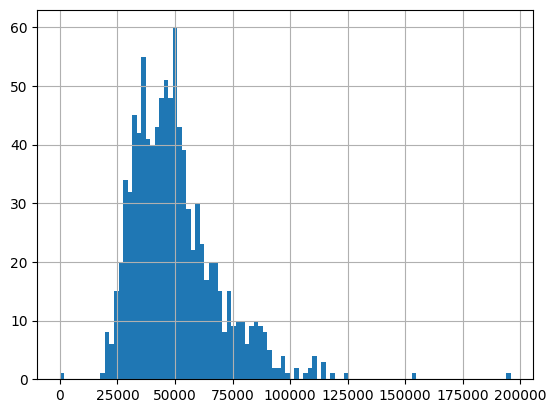

In [20]:
df.price.hist(bins=100)

## 05 Target column analysis

In [21]:
df.price.isna().sum()

np.int64(23)

In [22]:
df = df.loc[df.price.notna(), :]
df.shape

(972, 17)

<Axes: ylabel='price'>

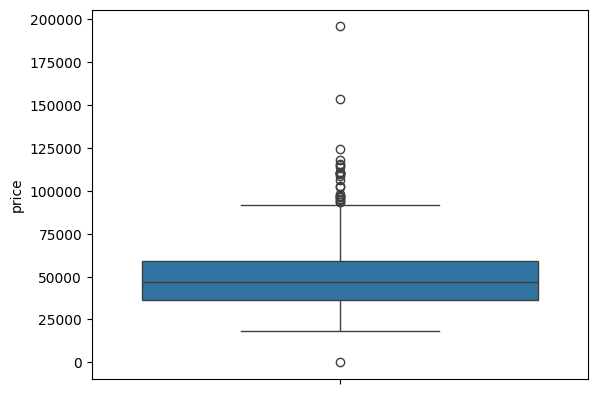

In [23]:
sns.boxplot(df.price)

### 05.1 Deleting outliers

In [24]:
df = df[(df["price"]>15000) & (df["price"]<84500)]

<Axes: ylabel='price'>

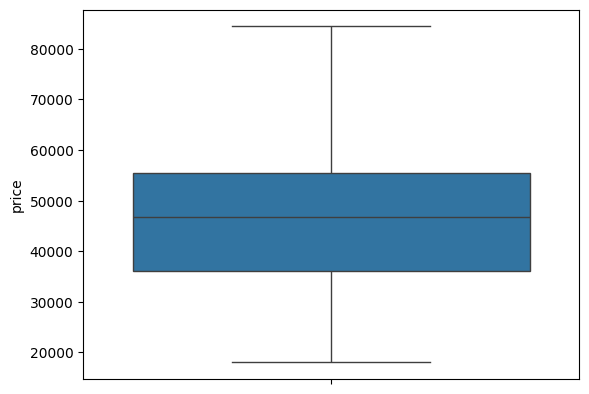

In [25]:
sns.boxplot(df.price)

### 05.1 Correlation analysis

In [26]:
numeric_columns.corr()['price'].sort_values(ascending=False)

price        1.000000
cylinders    0.487554
mileage      0.078405
year         0.011979
doors       -0.071472
Name: price, dtype: float64

### 05.2 Deletion of the 'description' column
This column contains only descriptions and includes the $ sign, which caused conflicts during processing. I decided to create a new DataFrame, df1, that will no longer include this column.

In [27]:
df1 = df.loc[:, df.columns.difference(["description"])]

### 05.3 Show heatmap
As we can see from the graph, there is a very weak correlation.

<Axes: >

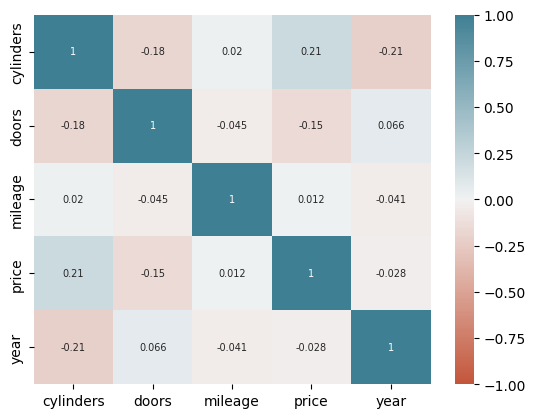

In [28]:
corrmat = df1.corr(numeric_only=True)
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            cmap=sns.diverging_palette(20,220,as_cmap=True))

### 05.4 To view graphs for object columns versus number column:

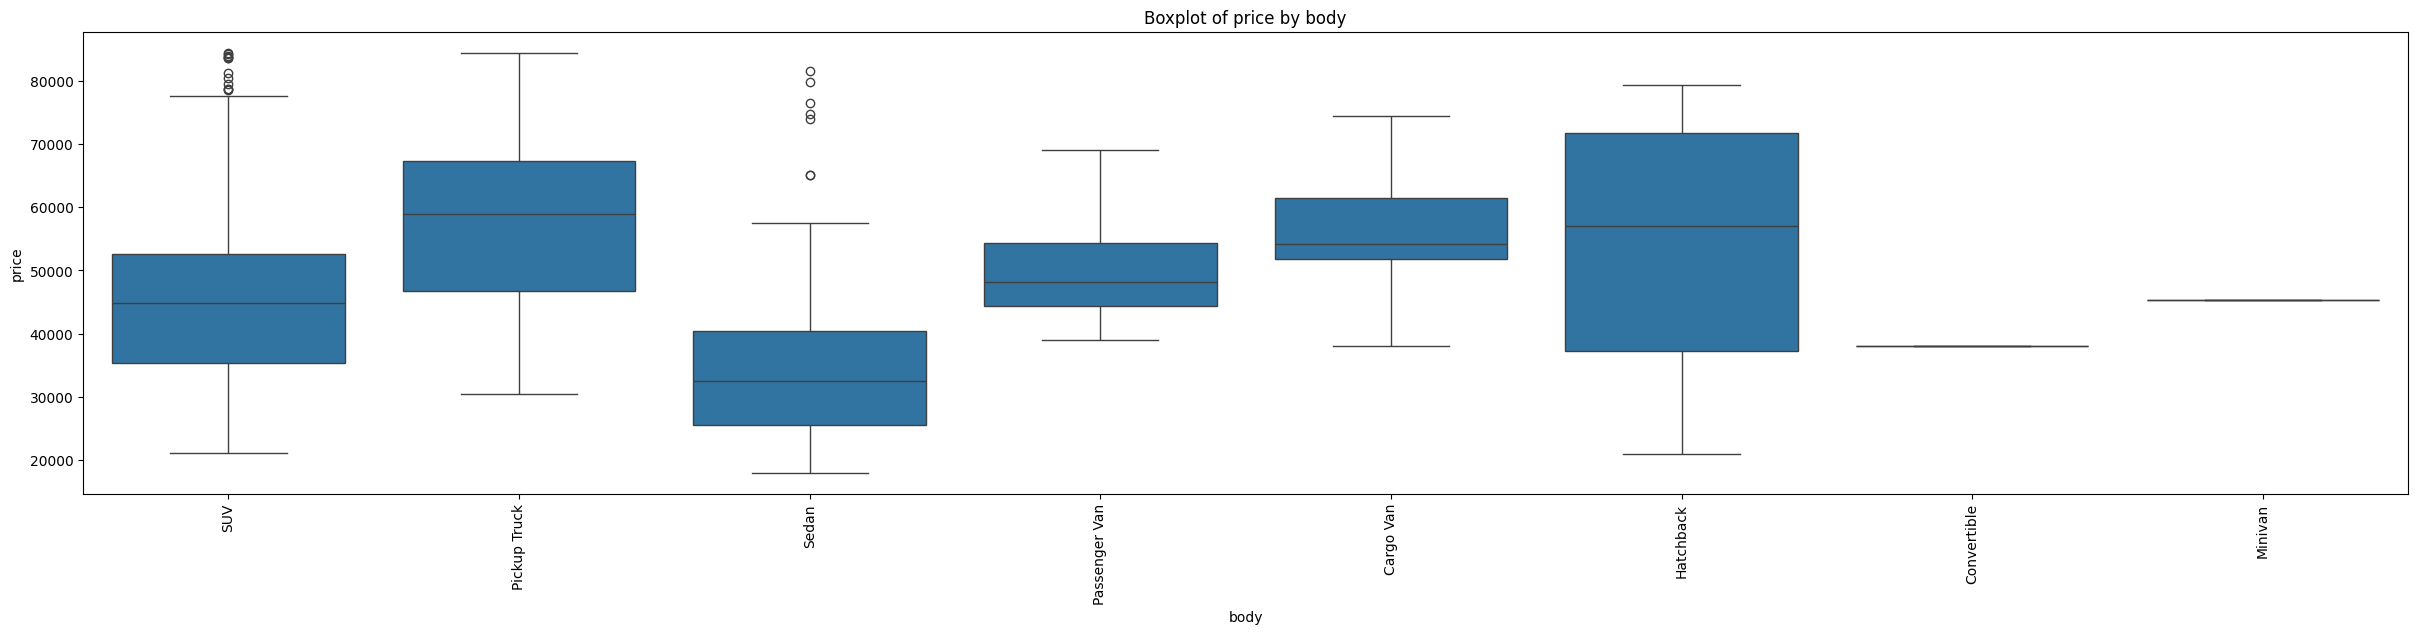

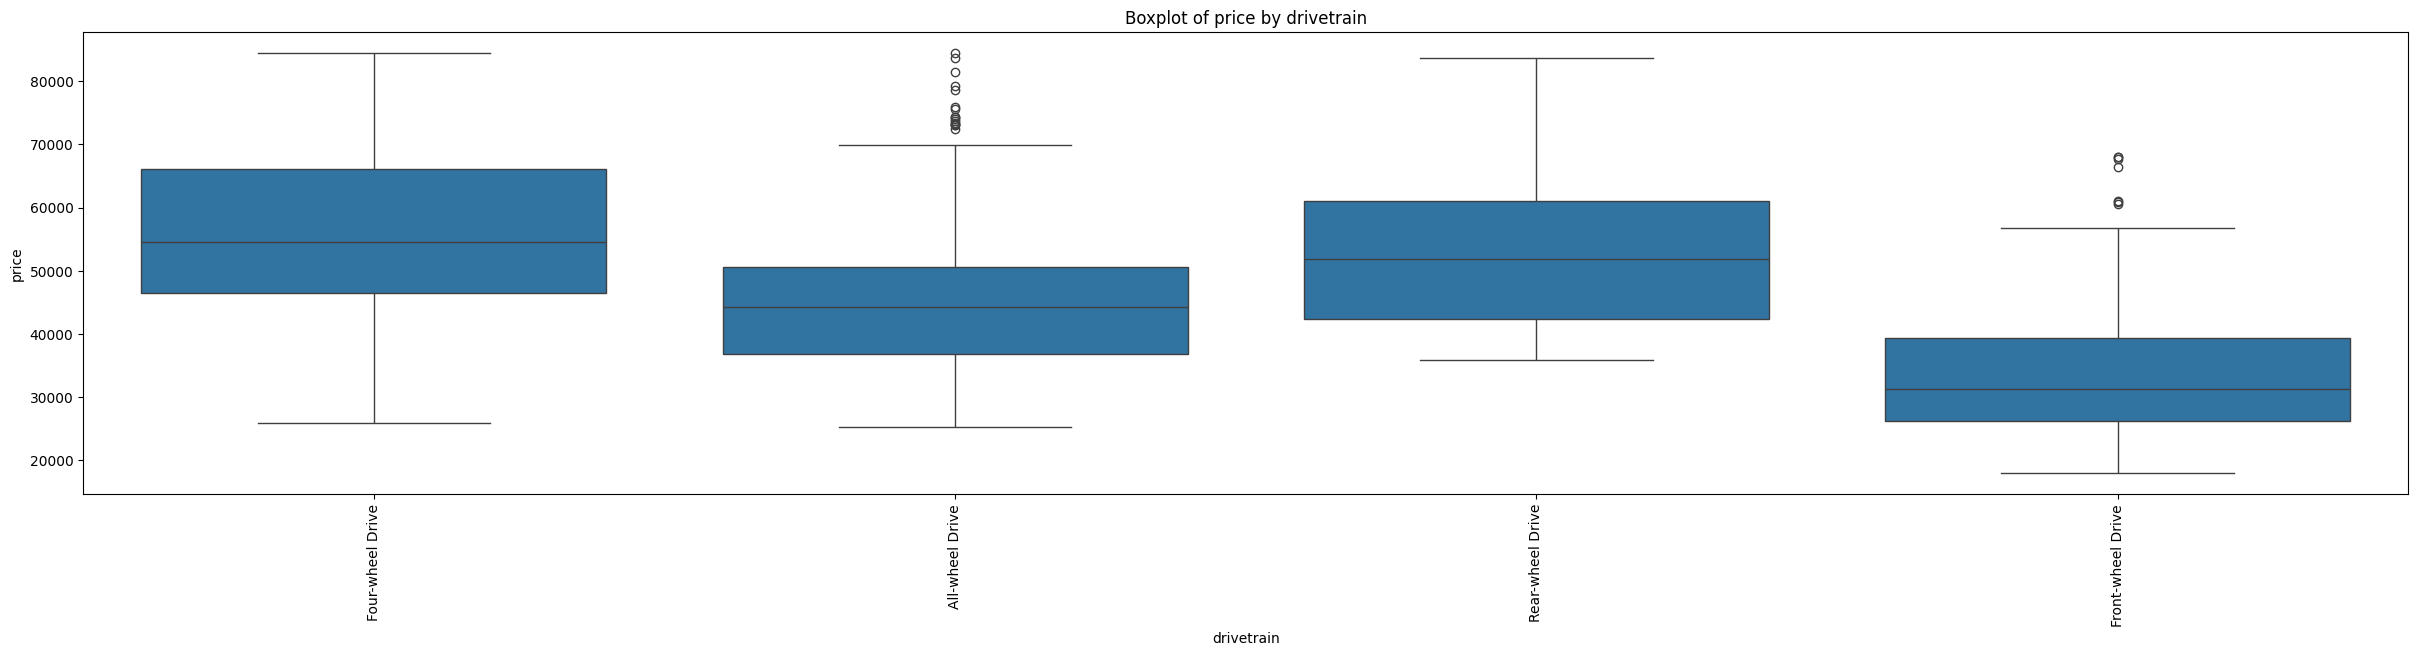

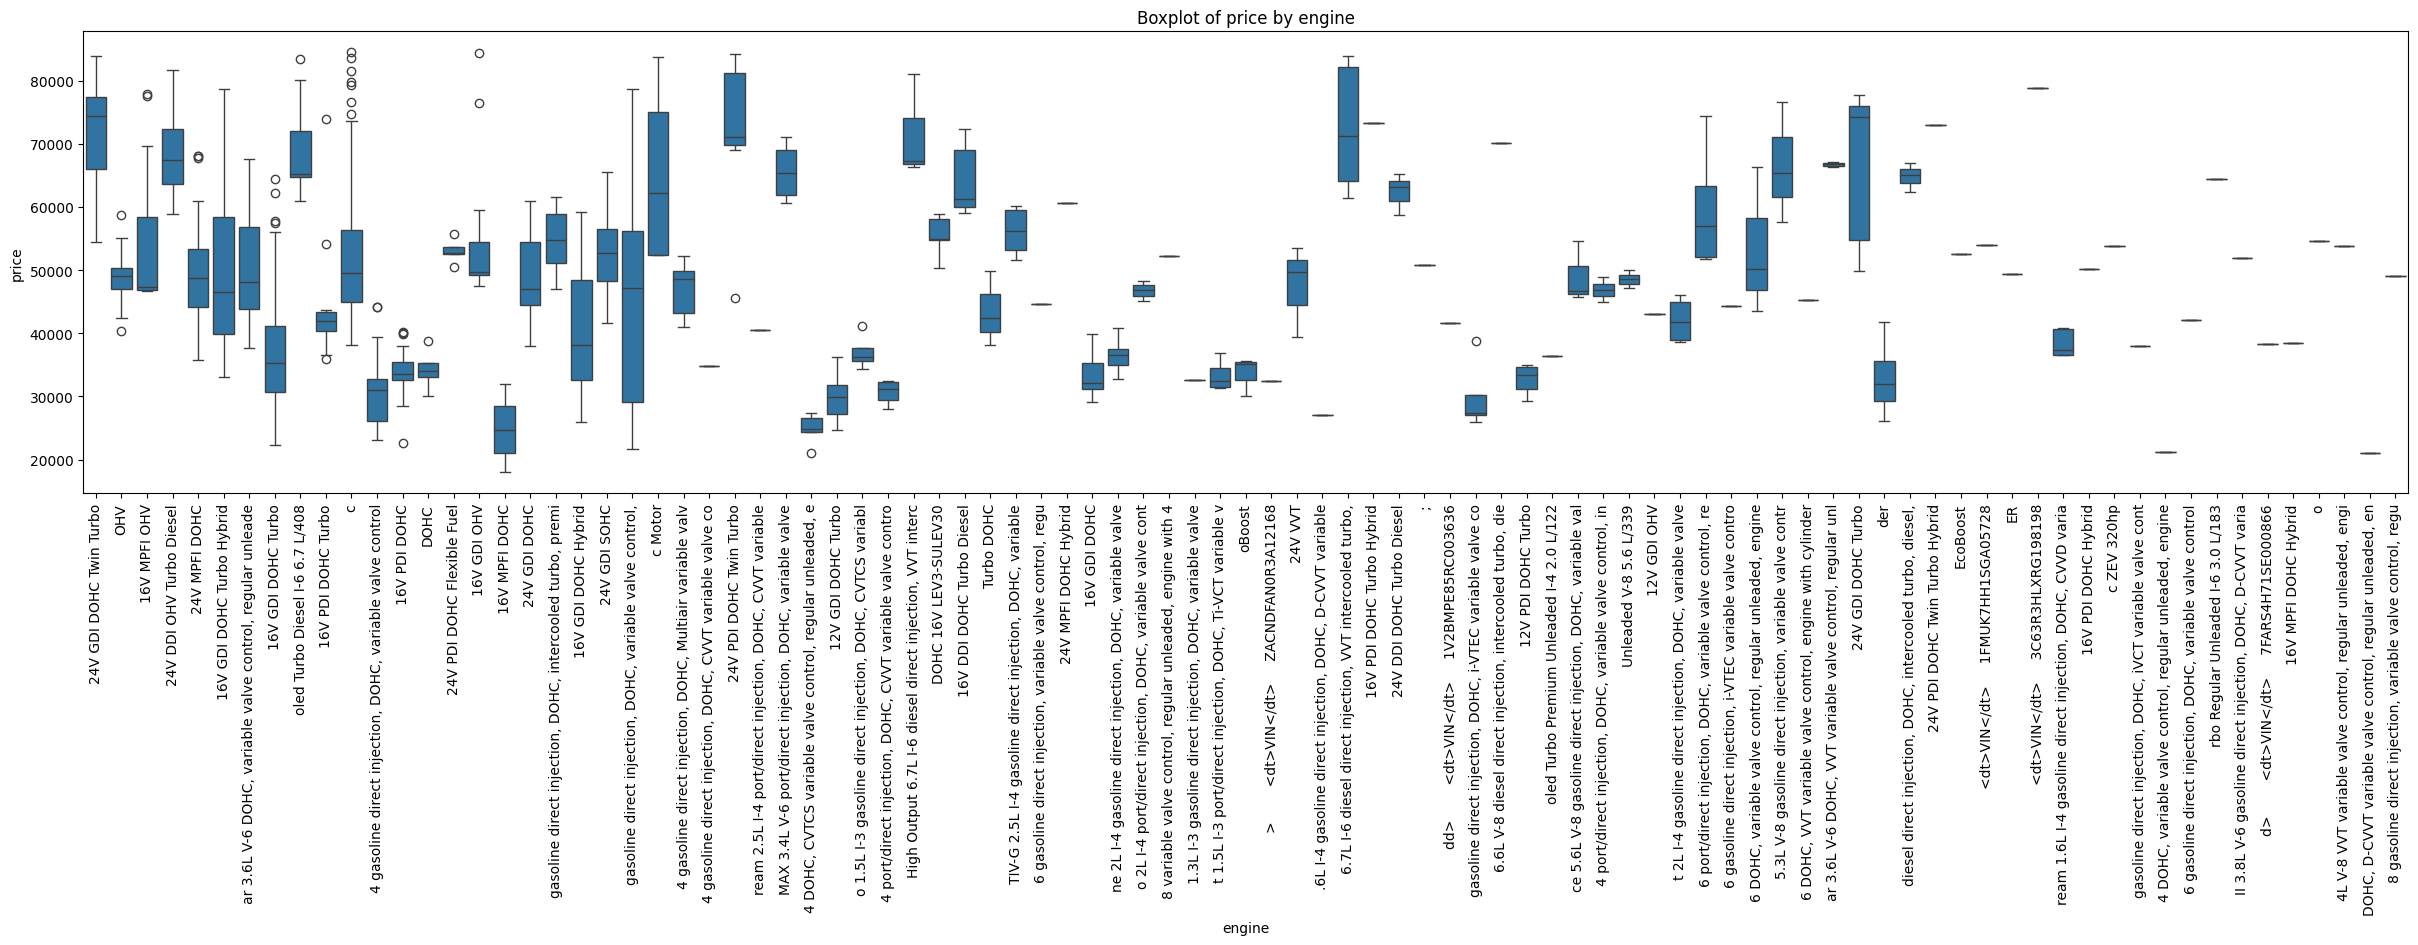

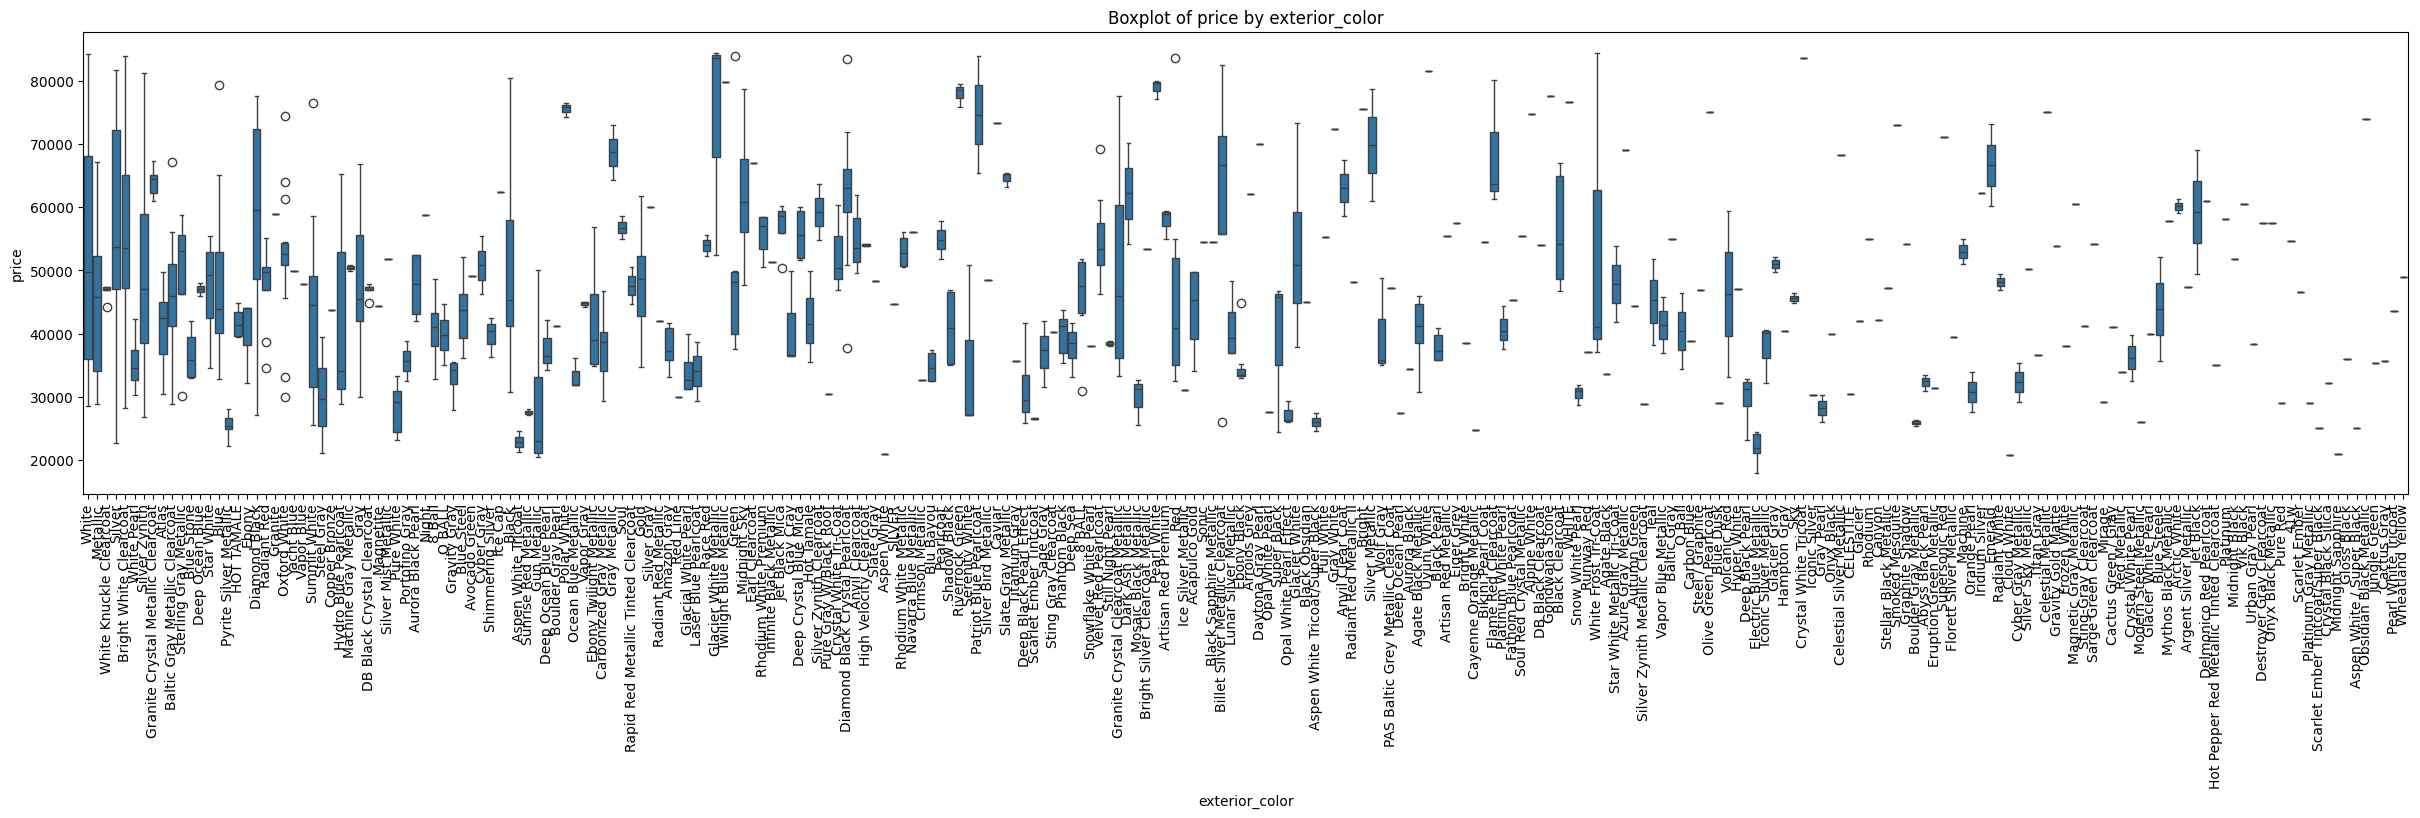

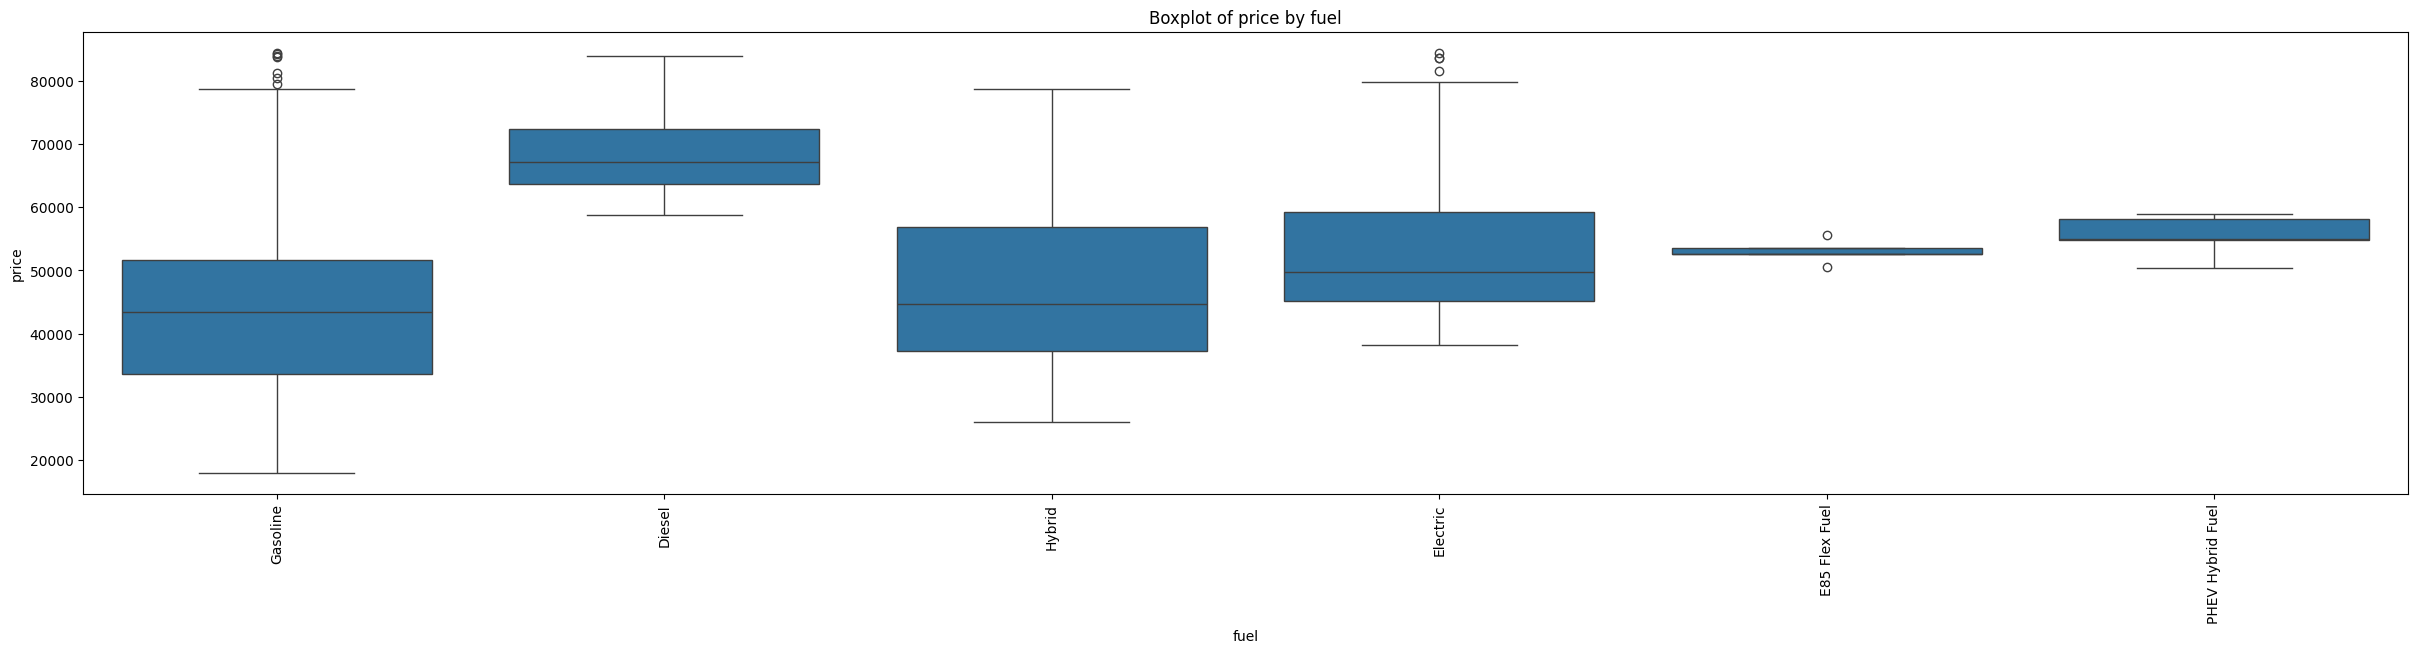

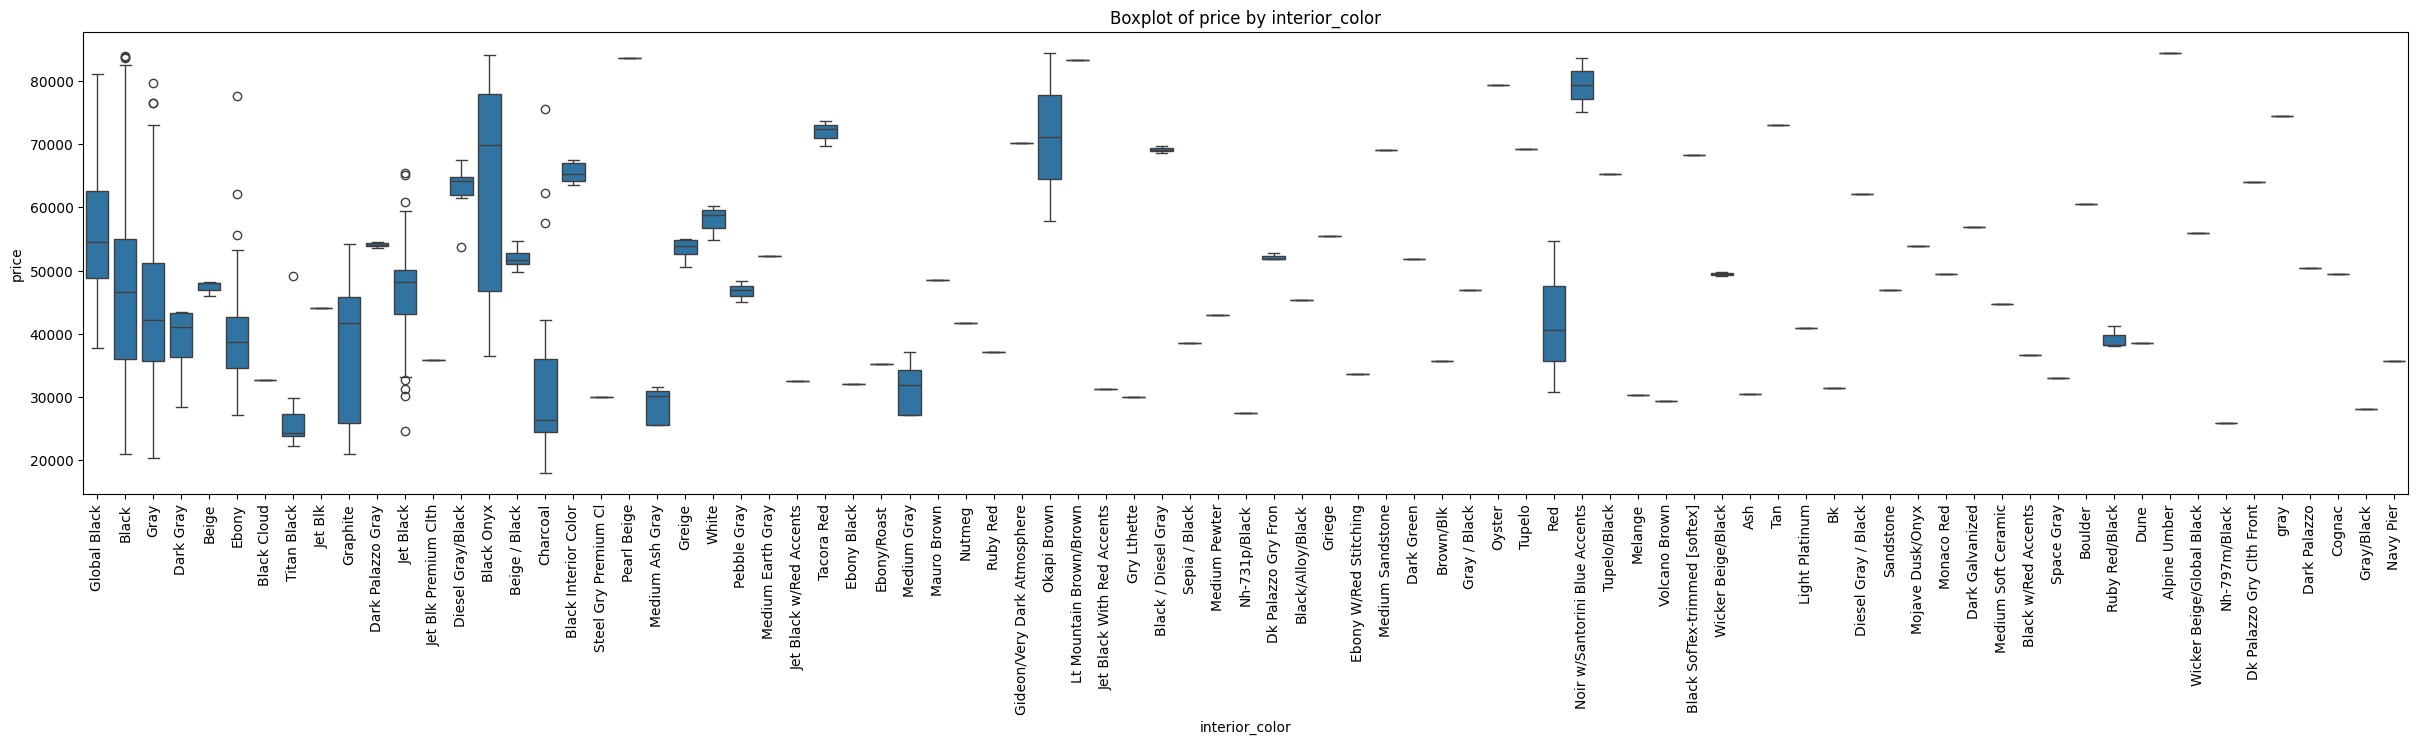

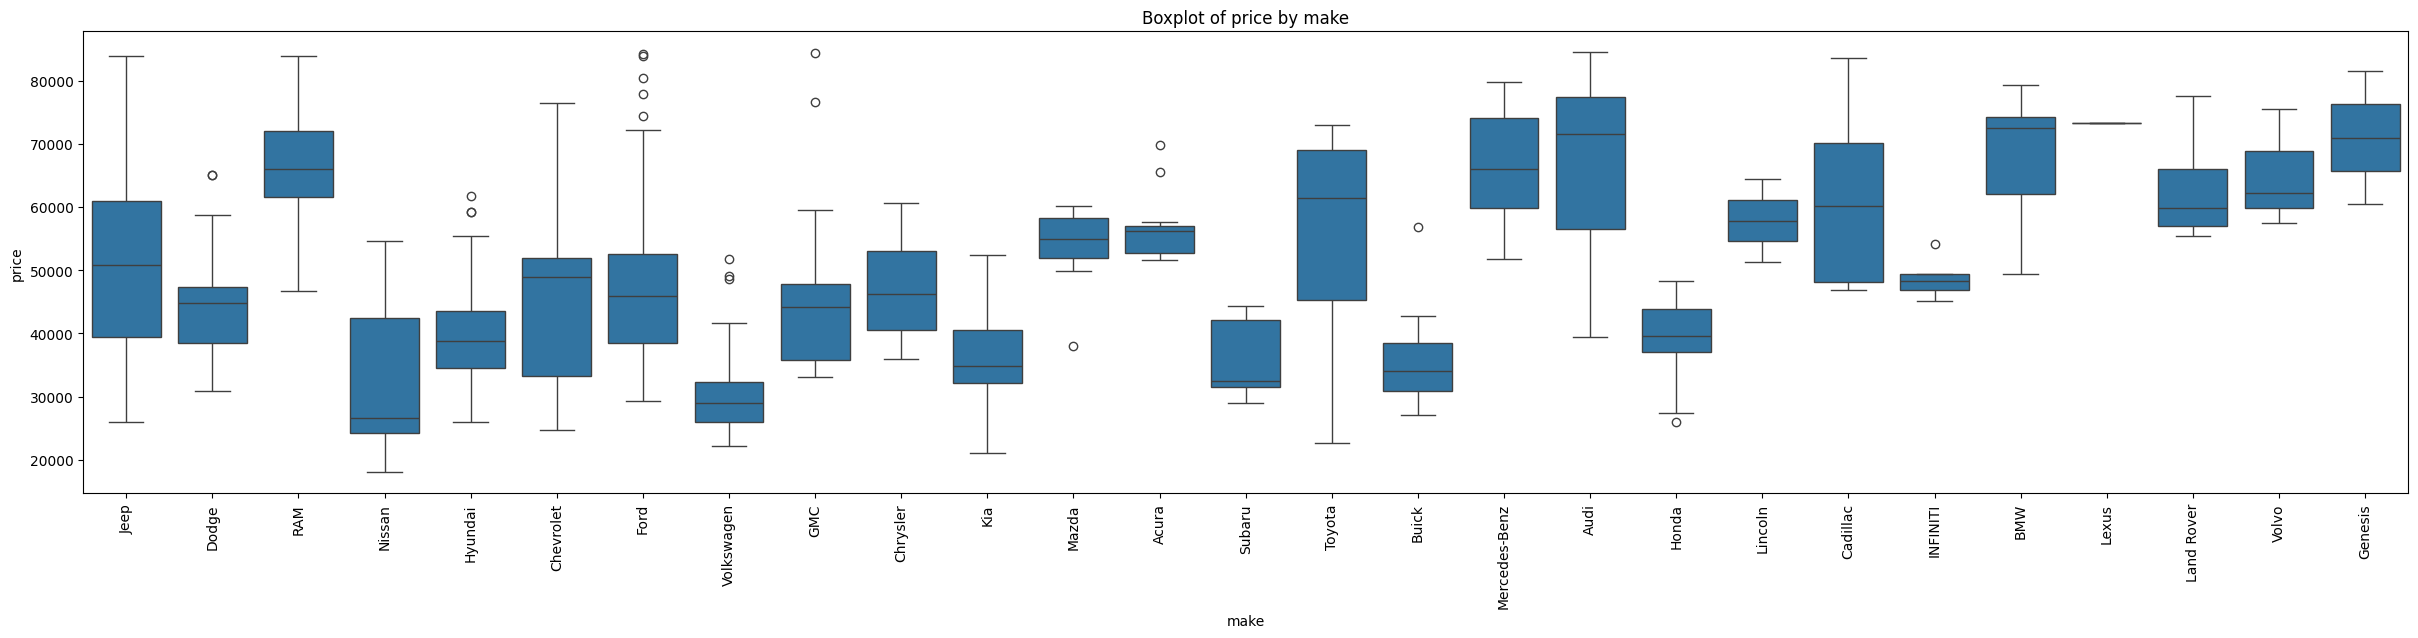

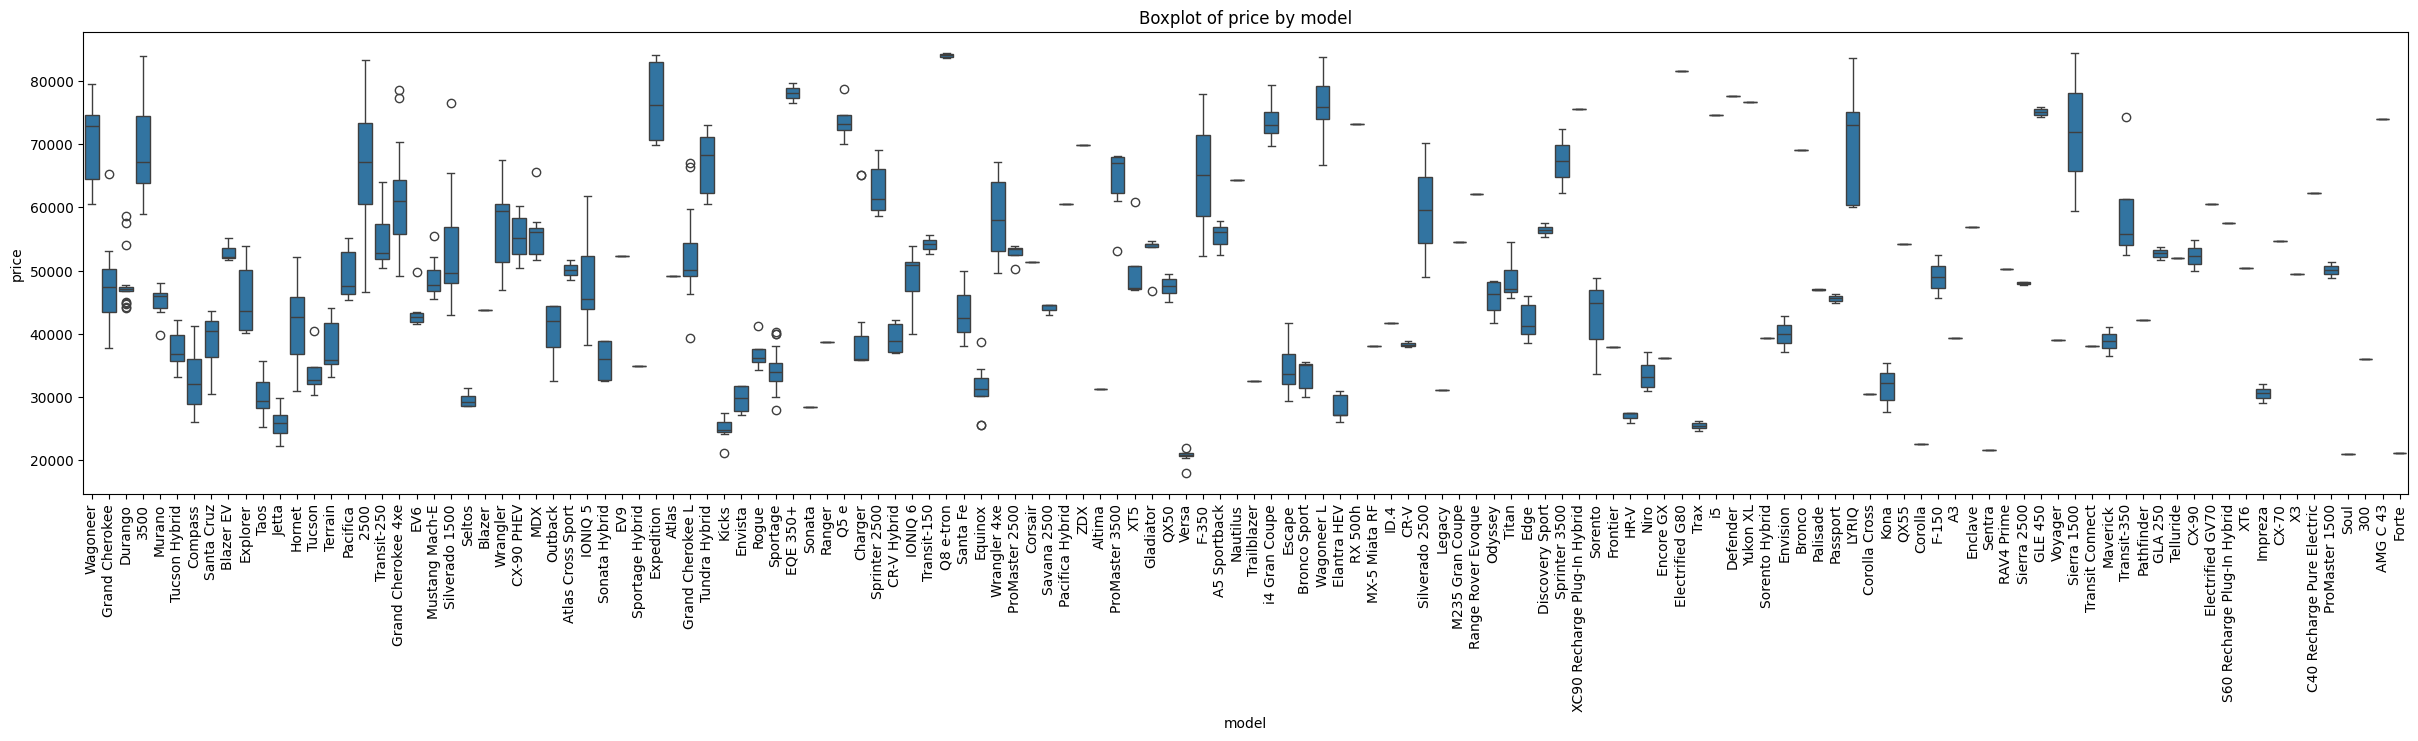

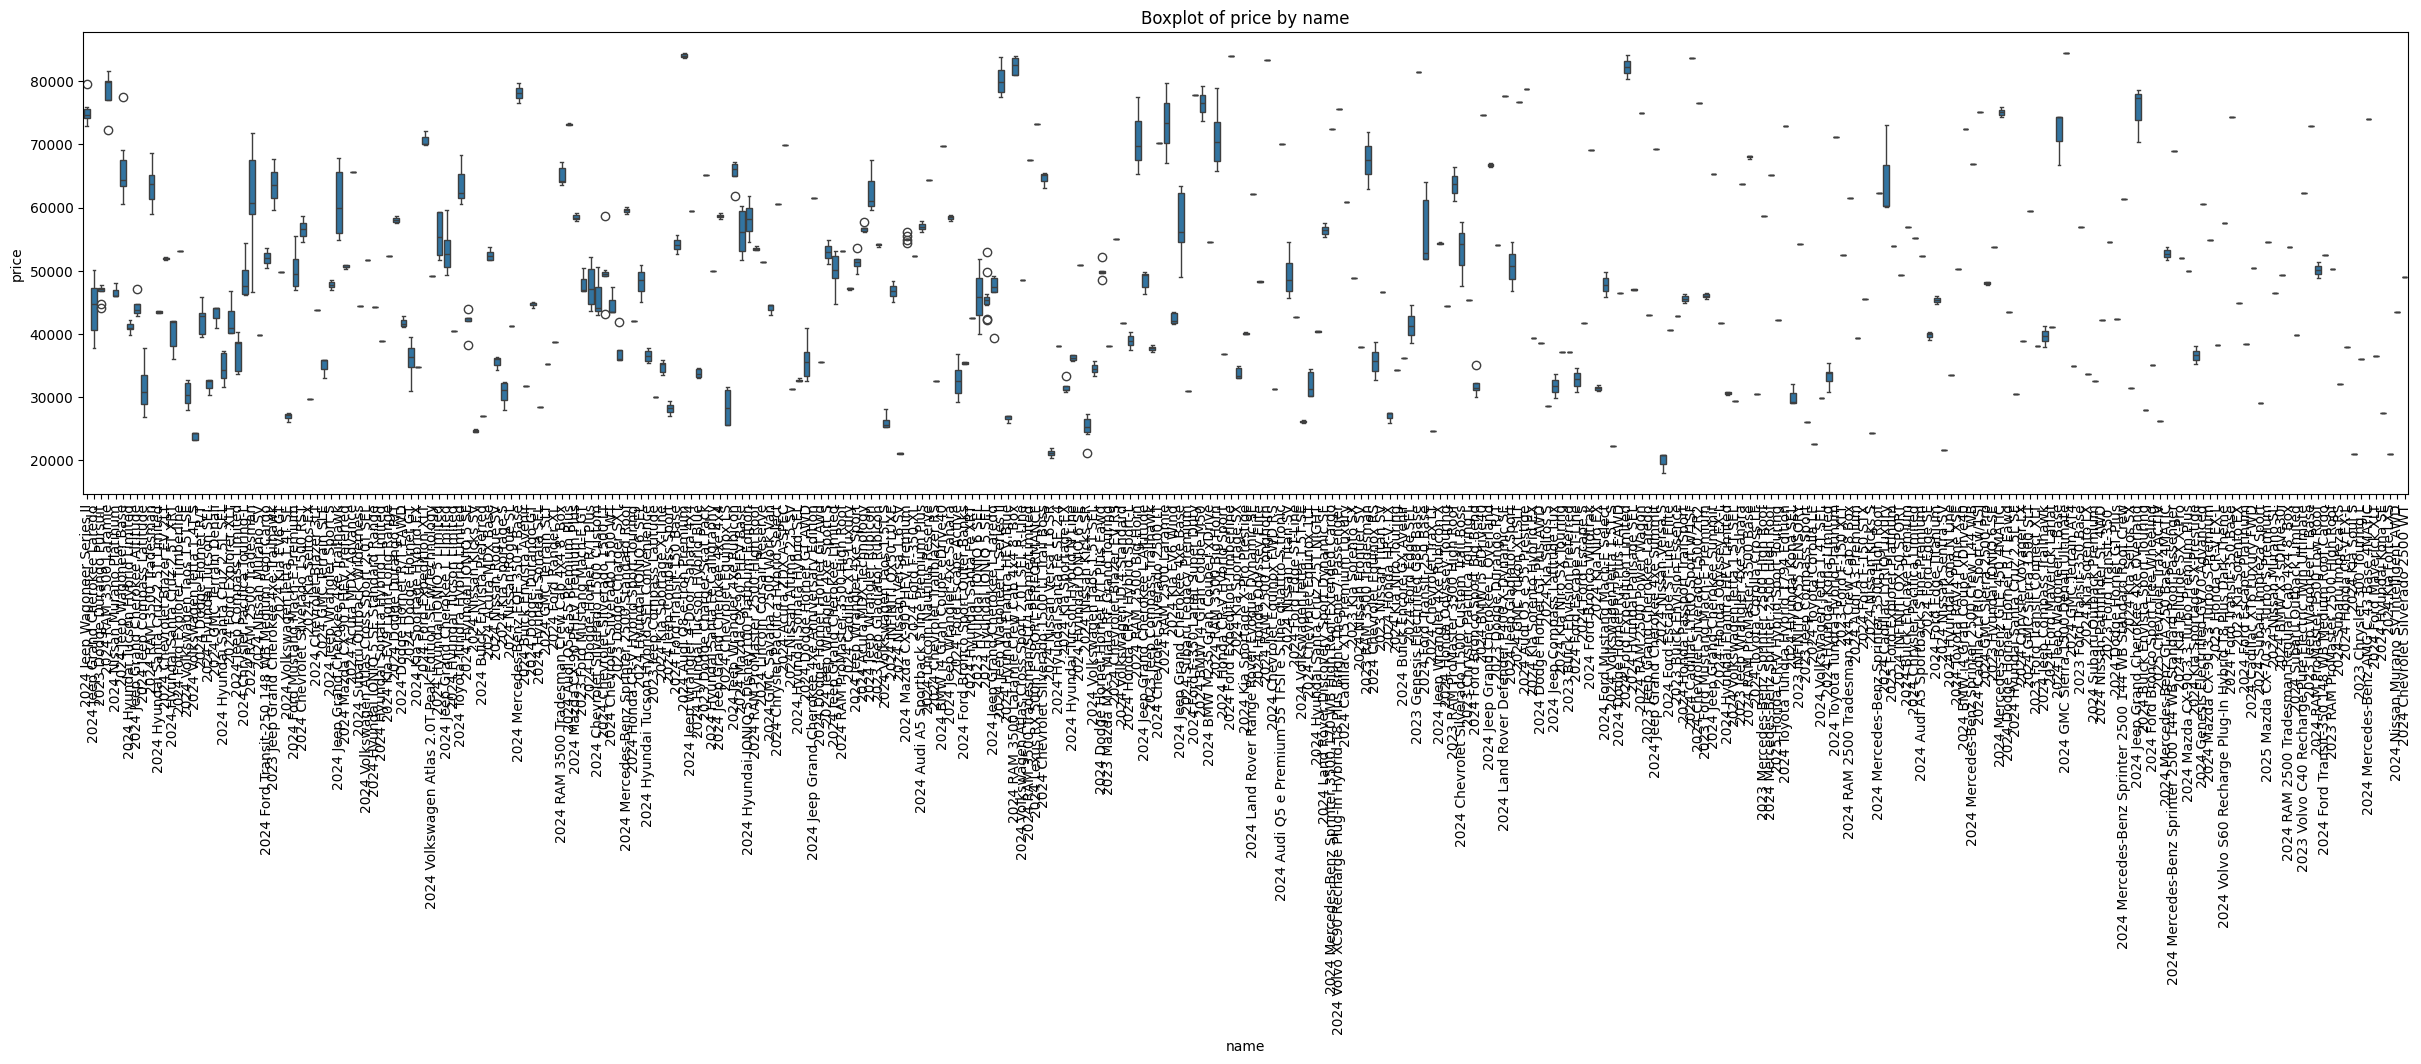

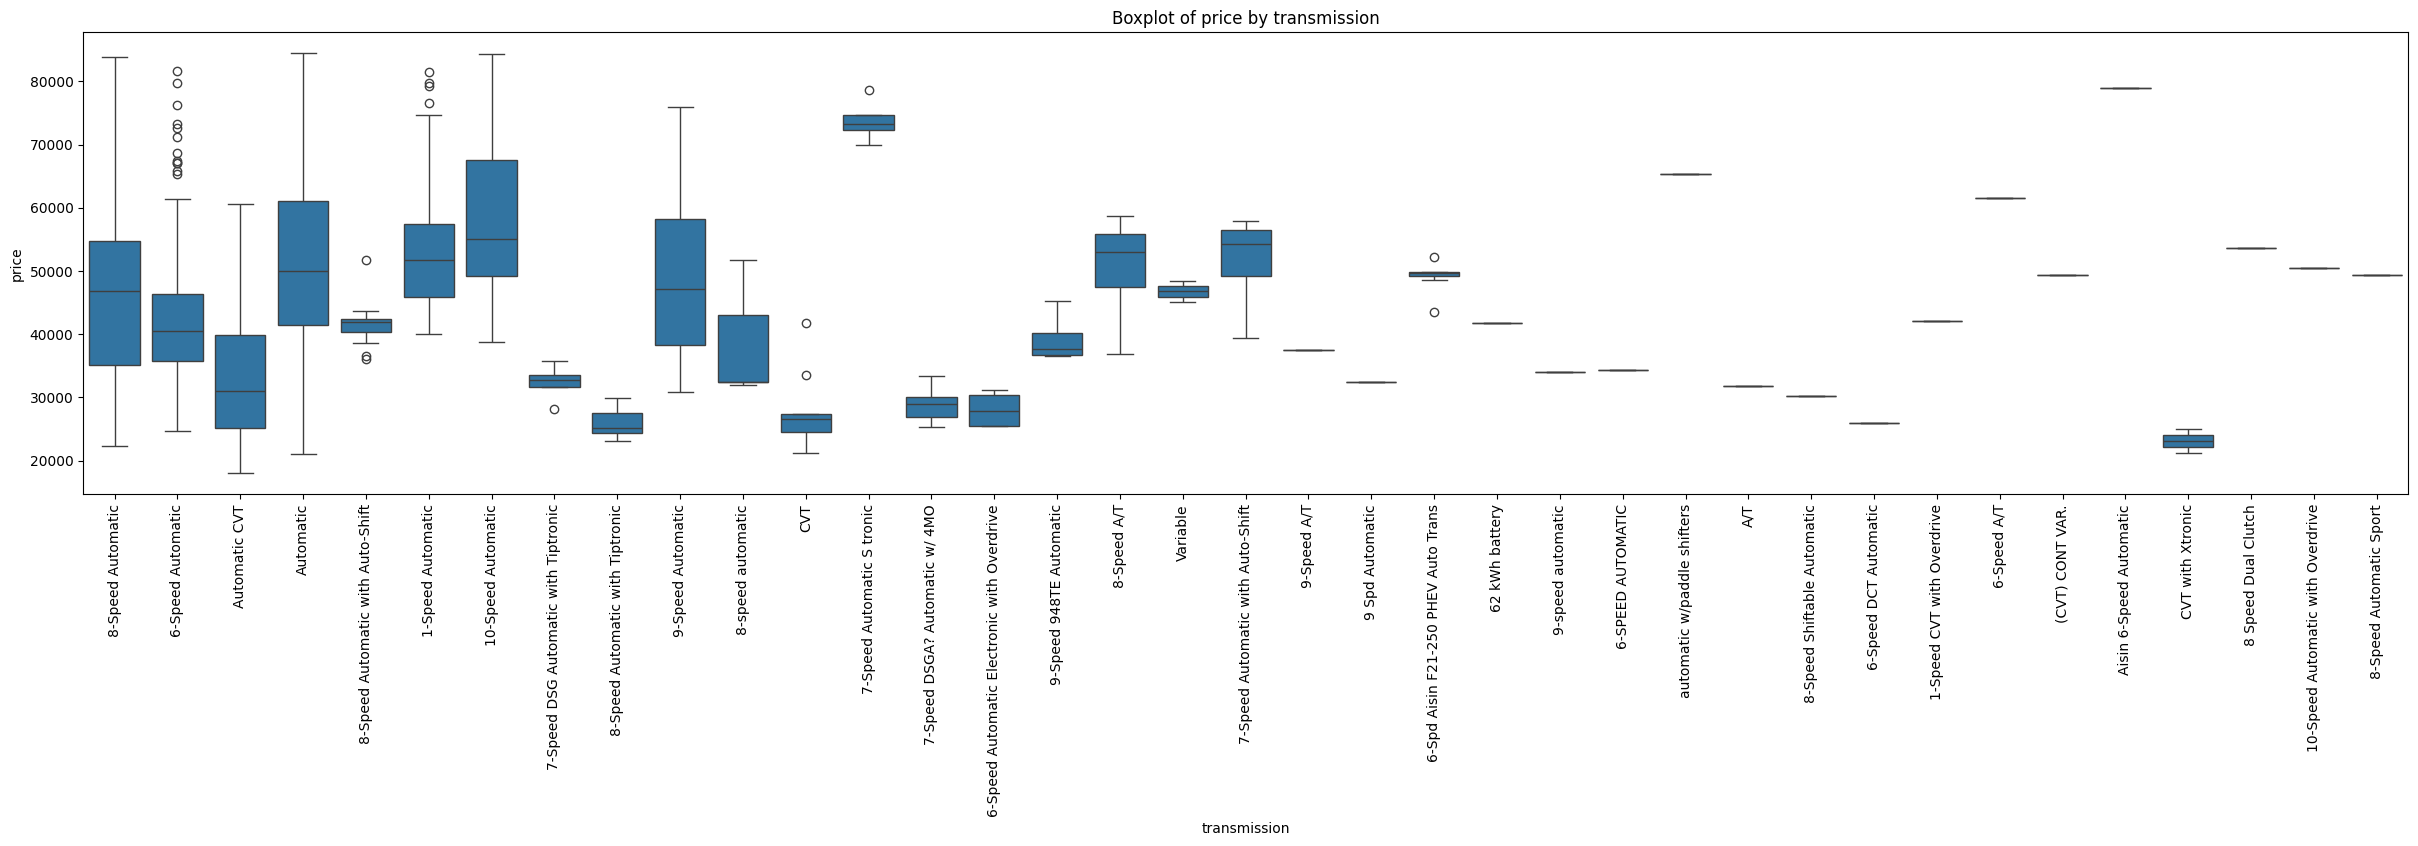

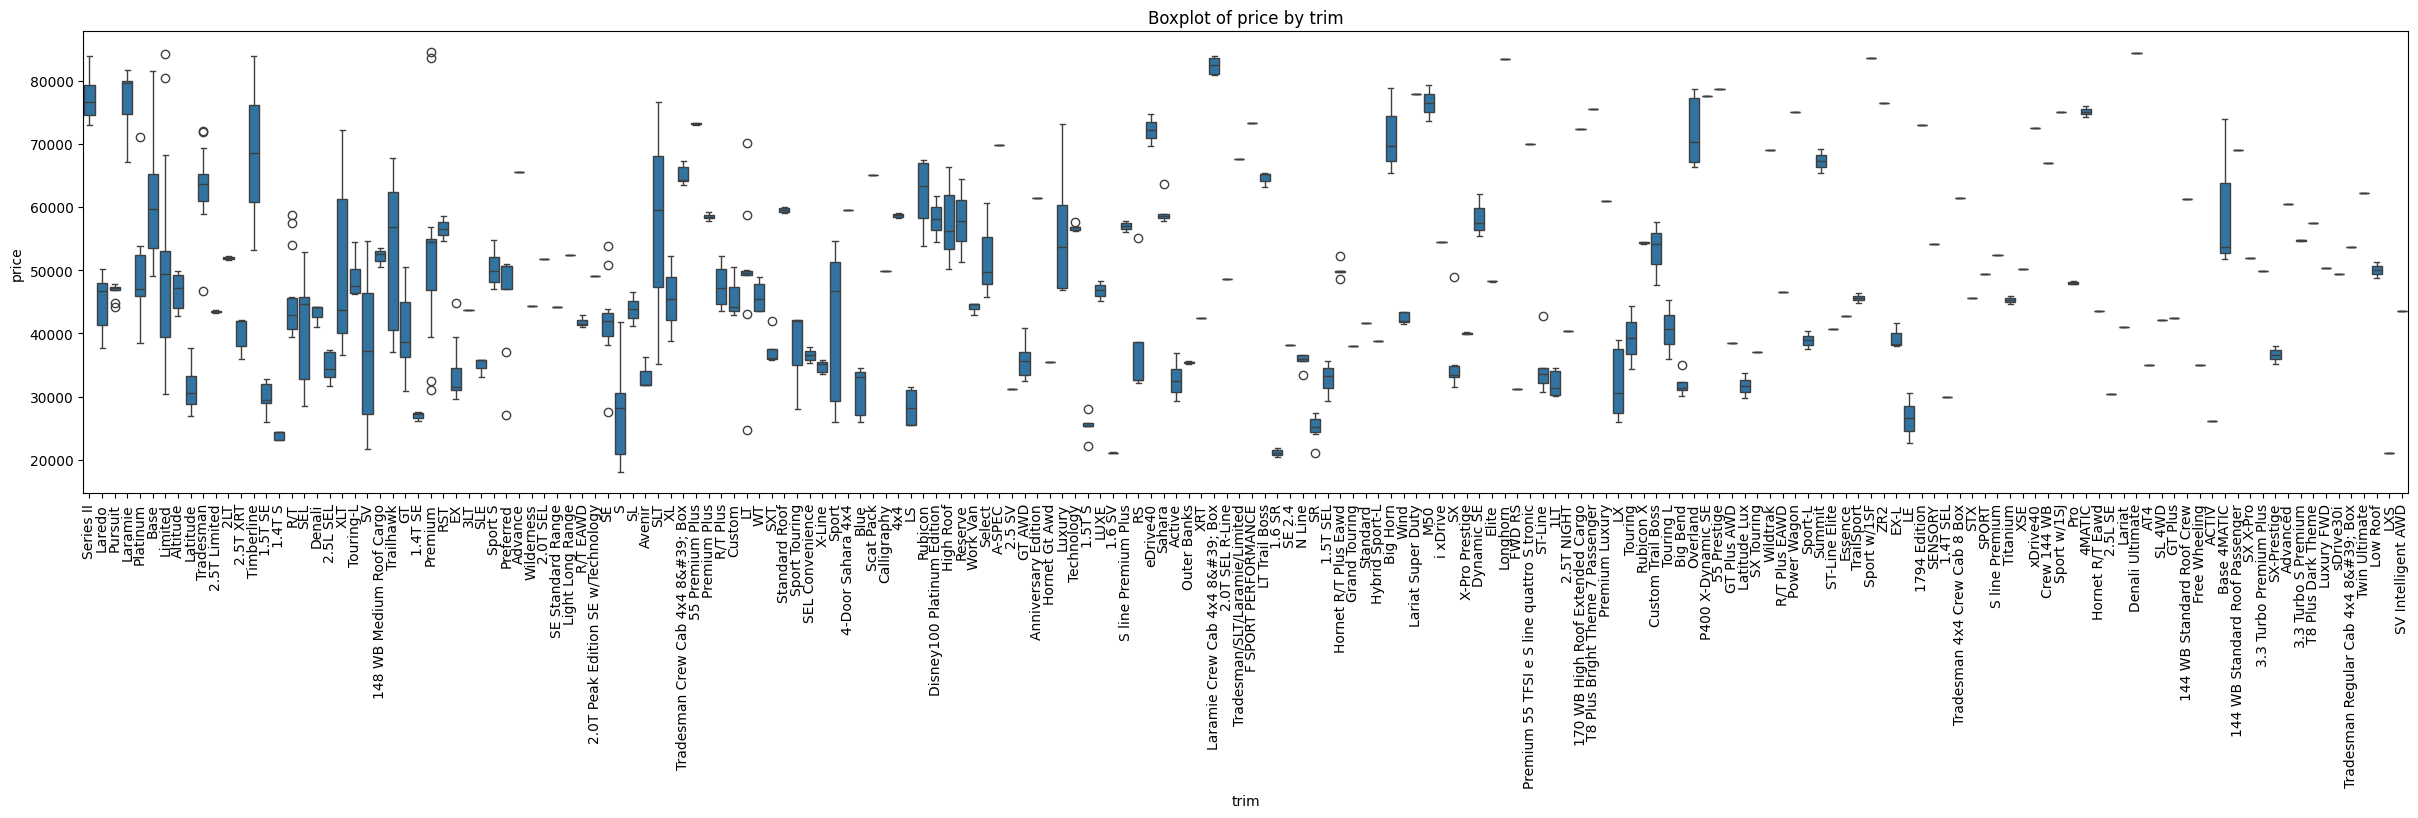

In [29]:
for col in df1.select_dtypes(include='object').columns:
    plt.figure(figsize=(30, 6))
    sns.boxplot(x=col, y='price', data=df1)
    plt.title(f'Boxplot of price by {col}')
    plt.xticks(rotation=90)

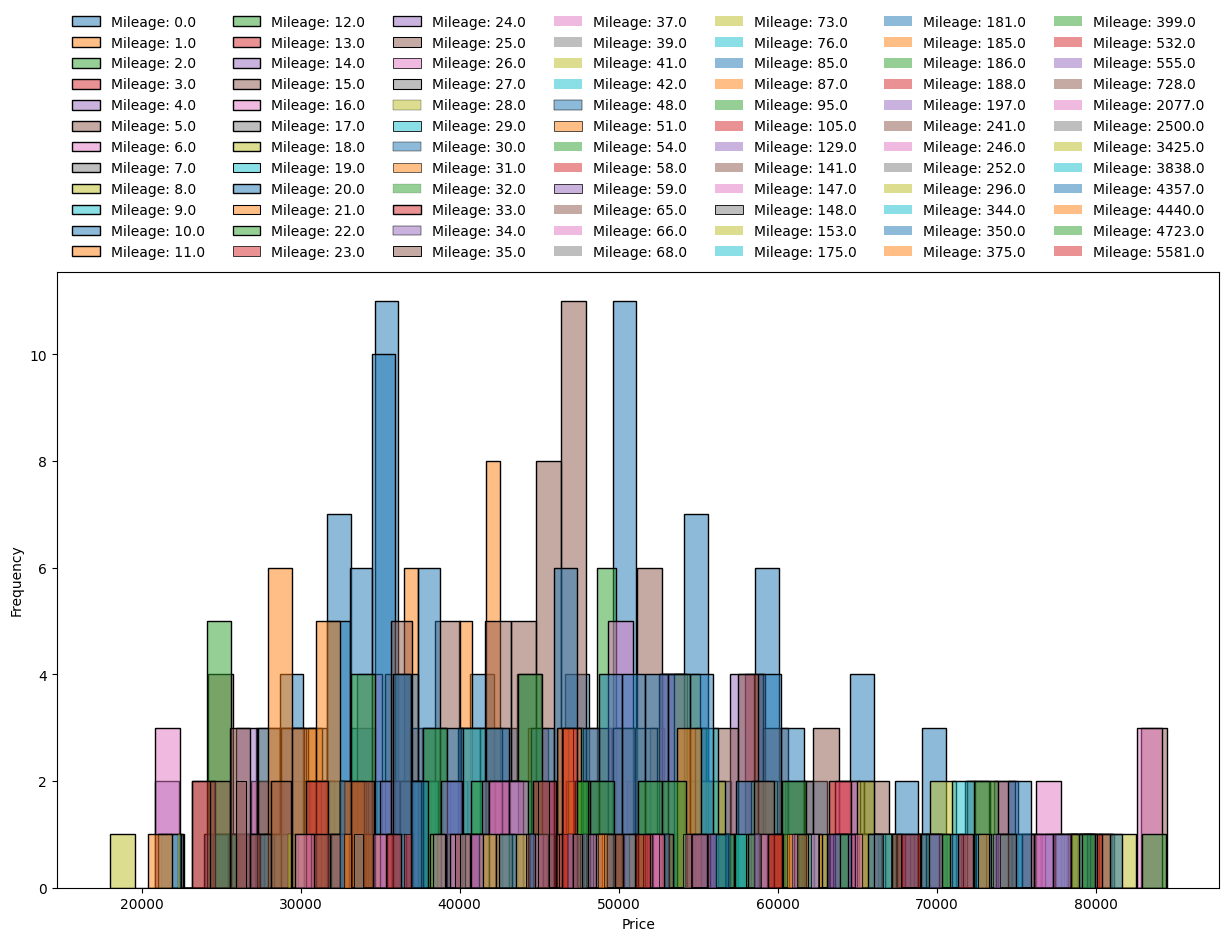

In [30]:
mil_price = df.groupby('mileage')['price']
plt.figure(figsize=(15, 8))
plt.frameon = False

for name, group in mil_price:
   g = sns.histplot(group, bins=40, alpha=0.5, label=f'Mileage: {name}')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=7, frameon=False,)

## Summary:

#### This dataset is not very suitable for analysis, as can be seen from the correlation of numerical values, which are too weak. Nevertheless, it is possible to extract a few interesting insights from the graphs.
